In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [2]:
df1=pd.read_csv('bengaluru_house_prices.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2=df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
pd.DataFrame(df3['size'].unique())

,0
0,2 BHK
1,4 Bedroom
2,3 BHK
3,4 BHK
4,6 Bedroom
5,3 Bedroom
6,1 BHK
7,1 RK
8,1 Bedroom
9,8 Bedroom


In [10]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\sayed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
df3.head(9)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3


In [12]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return True

In [18]:
convert_sqft_to_num('2100')

2100.0

In [19]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [20]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)

In [21]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [22]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [23]:
df5=df4.copy()

In [24]:
df5['per_sqr_ft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,per_sqr_ft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200,2.0,51.00,2,4250


In [25]:
len(df5.location.unique())

1304

In [26]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                                      535
Sarjapur  Road                                  392
Electronic City                                 304
Kanakpura Road                                  266
Thanisandra                                     236
Yelahanka                                       210
Uttarahalli                                     186
Hebbal                                          176
Marathahalli                                    175
Raja Rajeshwari Nagar                           171
Bannerghatta Road                               152
Hennur Road                                     150
7th Phase JP Nagar                              149
Haralur Road                                    141
Electronic City Phase II                        131
Rajaji Nagar                                    106
Chandapura                                       98
Bellandur                                        96
Hoodi                                            88
KR 

In [27]:
len(location_stats[location_stats<=10])

1052

In [28]:
location_stats_10=location_stats[location_stats<=10]
location_stats_10

location
BTM 1st Stage                                   10
Basapura                                        10
Sector 1 HSR Layout                             10
Naganathapura                                   10
Kalkere                                         10
Nagadevanahalli                                 10
Nagappa Reddy Layout                            10
Sadashiva Nagar                                 10
Gunjur Palya                                    10
Dairy Circle                                    10
Ganga Nagar                                     10
Dodsworth Layout                                10
1st Block Koramangala                           10
Chandra Layout                                   9
Jakkur Plantation                                9
2nd Phase JP Nagar                               9
Yemlur                                           9
Mathikere                                        9
Medahalli                                        9
Volagerekallahalli    

In [29]:
len(df5.location.unique())

1293

In [30]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_10 else x)

In [31]:
len(df5.location.unique())

242

In [32]:
df5.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
5                      Whitefield
6                Old Airport Road
7                    Rajaji Nagar
8                    Marathahalli
9                           other
10                     Whitefield
11                     Whitefield
12             7th Phase JP Nagar
13                      Gottigere
14                       Sarjapur
15                    Mysore Road
16                  Bisuvanahalli
17          Raja Rajeshwari Nagar
18                          other
19                          other
20                        Kengeri
21                     Binny Pete
22                    Thanisandra
23                      Bellandur
24                    Thanisandra
25                          other
26                Electronic City
27                     Whitefield
28               Ramagondanahalli
29            

In [33]:
df5.head()

,location,size,total_sqft,bath,price,bhk,per_sqr_ft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200,2.0,51.00,2,4250


In [34]:
df5[(df5.total_sqft/df5.bhk)<300].head()

,location,size,total_sqft,bath,price,bhk,per_sqr_ft
9,other,6 Bedroom,1020,6.0,370.0,6,36274.5
45,HSR Layout,8 Bedroom,600,9.0,200.0,8,33333.3
58,Murugeshpalya,6 Bedroom,1407,4.0,150.0,6,10661
68,Devarachikkanahalli,8 Bedroom,1350,7.0,85.0,8,6296.3
70,other,3 Bedroom,500,3.0,100.0,3,20000


In [35]:
df5.shape

(13246, 7)

In [36]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

In [37]:
df6.per_sqr_ft.describe()

count     12456.0
unique     7340.0
top        5000.0
freq        146.0
Name: per_sqr_ft, dtype: float64

In [38]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.per_sqr_ft)
        st=np.std(subdf.per_sqr_ft)
        reduce_df=subdf[(subdf.per_sqr_ft>(m-st))&(subdf.per_sqr_ft<=(m+st))]
        df_out=pd.concat([df_out, reduce_df], ignore_index=True)
    return df_out
df7=remove_pps_outliers(df6)
df7.shape

(10241, 7)

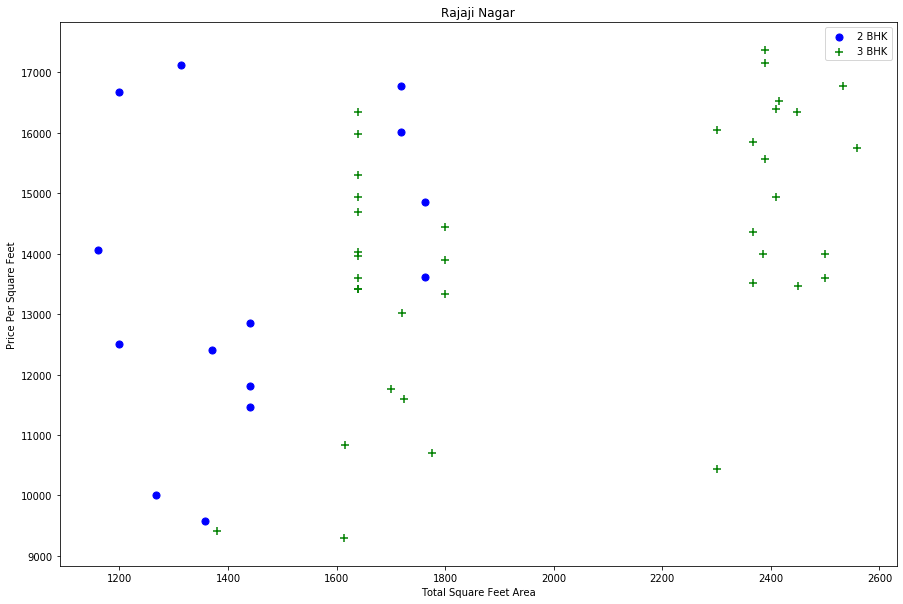

In [40]:
def plot_scatter_chart(df, location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.per_sqr_ft, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.per_sqr_ft, marker='+', color='green', label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7, "Rajaji Nagar")

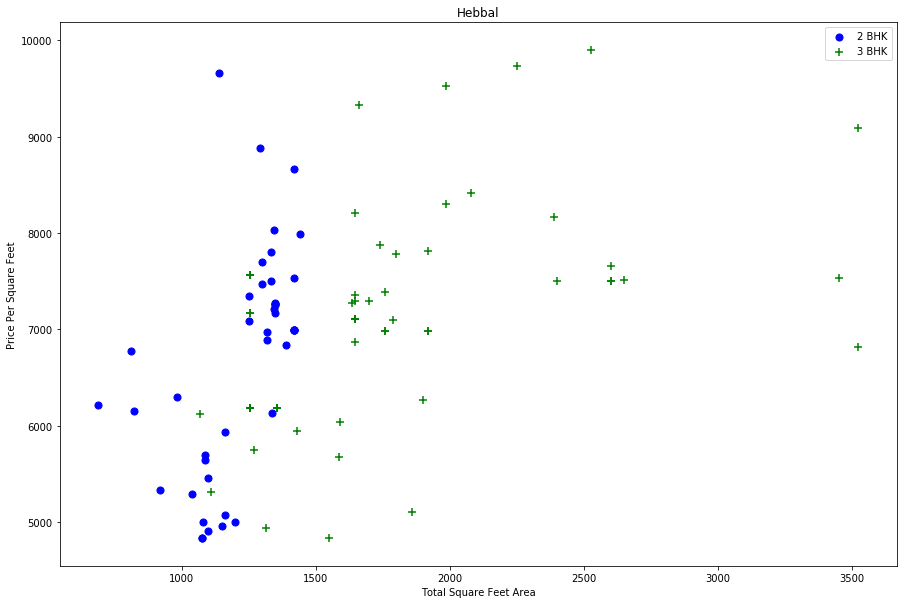

In [42]:
plot_scatter_chart(df7, "Hebbal")

In [43]:
def remove_bhk_outlier(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.per_sqr_ft),
                'std':np.std(bhk_df.per_sqr_ft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices, bhk_df[bhk_df.per_sqr_ft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df8=remove_bhk_outlier(df7)
df8.shape

(7329, 7)

In [44]:
df8.head(5)

,location,size,total_sqft,bath,price,bhk,per_sqr_ft
0,1st Block Jayanagar,4 BHK,2850,4.0,428.0,4,15017.5
1,1st Block Jayanagar,3 BHK,1630,3.0,194.0,3,11901.8
2,1st Block Jayanagar,3 BHK,1875,2.0,235.0,3,12533.3
3,1st Block Jayanagar,3 BHK,1200,2.0,130.0,3,10833.3
4,1st Block Jayanagar,2 BHK,1235,2.0,148.0,2,11983.8


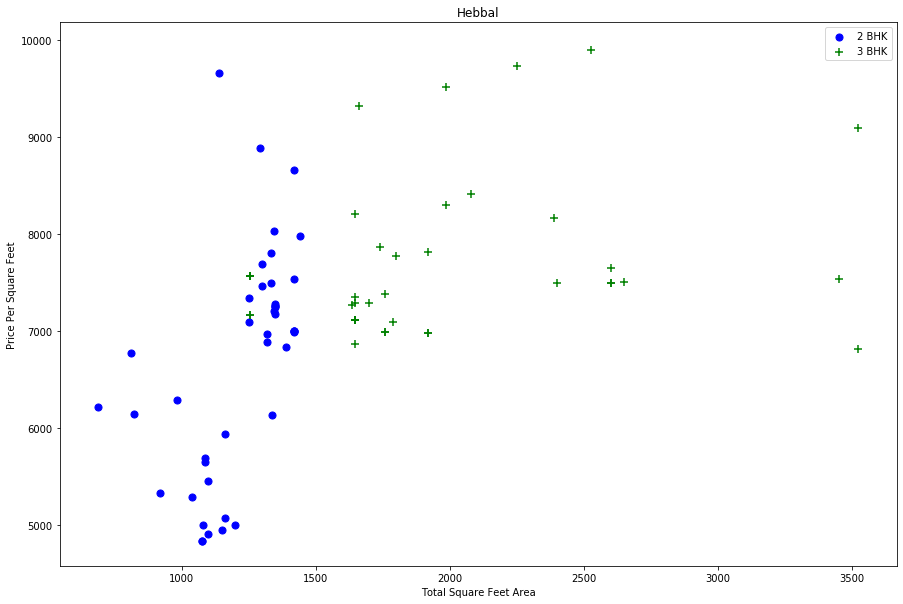

In [47]:
plot_scatter_chart(df8, "Hebbal")

Text(0, 0.5, 'count')

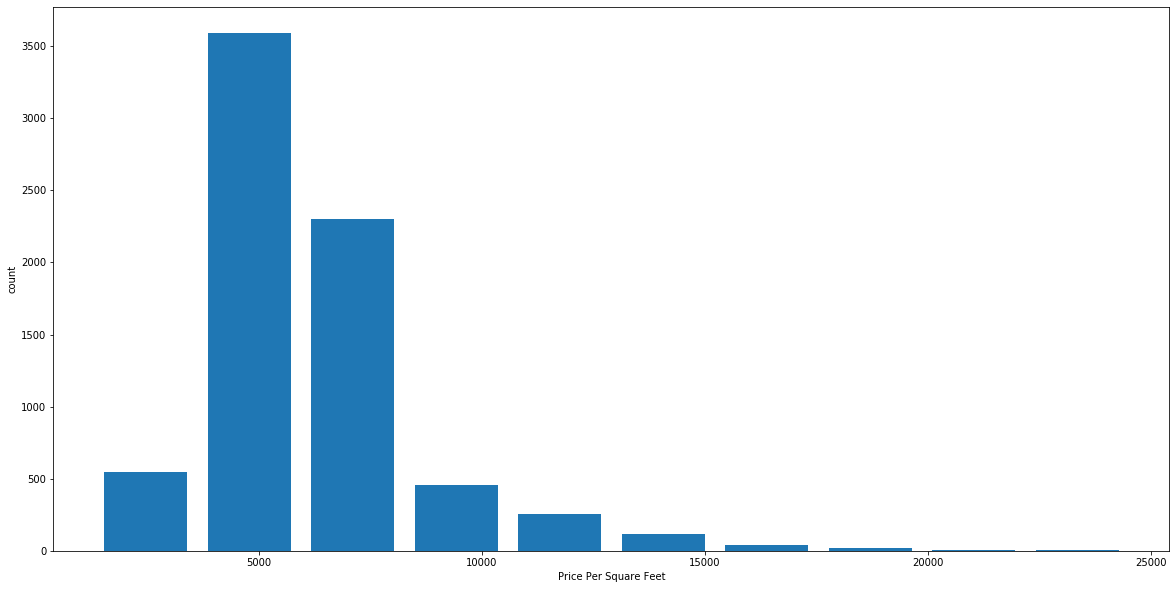

In [52]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.per_sqr_ft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("count")

In [53]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [54]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,per_sqr_ft
5277,Neeladri Nagar,10 BHK,4000,12.0,160.0,10,4000
8486,other,10 BHK,12000,12.0,525.0,10,4375
8575,other,16 BHK,10000,16.0,550.0,16,5500
9308,other,11 BHK,6000,12.0,150.0,11,2500
9639,other,13 BHK,5425,13.0,275.0,13,5069.12


Text(0, 0.5, 'count')

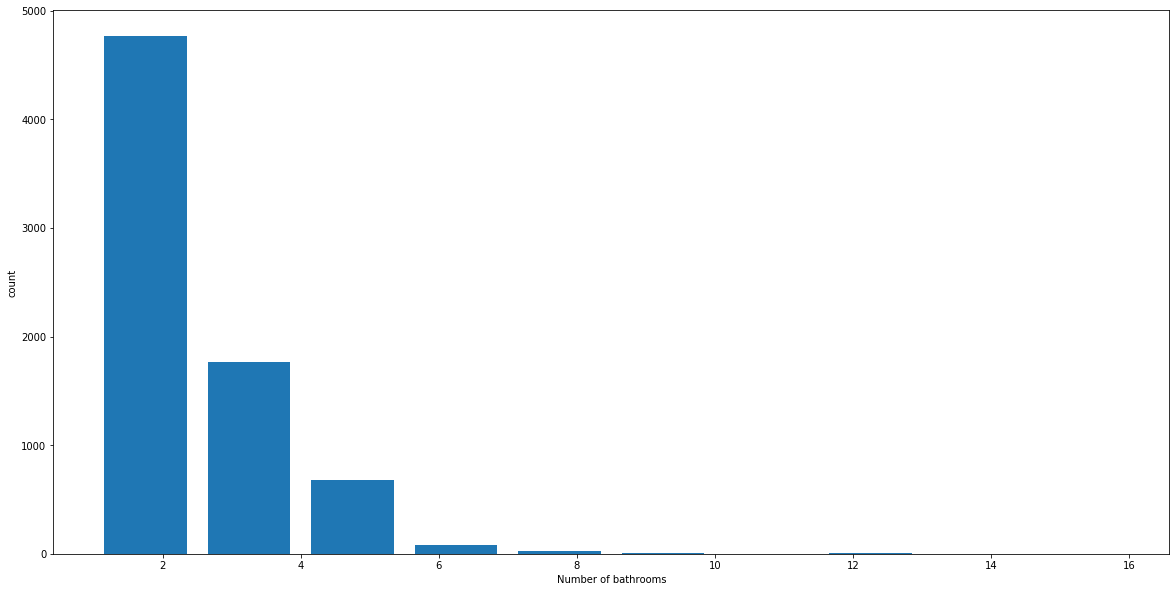

In [55]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("count")

In [56]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,per_sqr_ft
1626,Chikkabanavar,4 Bedroom,2460,7.0,80.0,4,3252.03
5238,Nagasandra,4 Bedroom,7000,8.0,450.0,4,6428.57
6711,Thanisandra,3 BHK,1806,6.0,116.0,3,6423.03
8411,other,6 BHK,11338,9.0,1000.0,6,8819.9


In [57]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [58]:
df10=df9.drop(['size', 'per_sqr_ft'], axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850,4.0,428.0,4
1,1st Block Jayanagar,1630,3.0,194.0,3
2,1st Block Jayanagar,1875,2.0,235.0,3
3,1st Block Jayanagar,1200,2.0,130.0,3
4,1st Block Jayanagar,1235,2.0,148.0,2
